<a href="https://colab.research.google.com/github/AmeyaP26/1st_use/blob/main/BeatO_EDA_Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bg = pd.read_excel('report.xlsx')
bg

,Date,Time,Type,Value (mg/dL),High/Low/In-Range,Notes
0,29 Apr 2024,7:29 PM,Pre Dinner,106,CONTROLLED,NaN
1,29 Apr 2024,5:52 PM,Random,227,VERY HIGH,NaN
2,29 Apr 2024,4:45 PM,Random,279,VERY HIGH,NaN
3,29 Apr 2024,10:15 AM,Post Breakfast,112,CONTROLLED,NaN
4,29 Apr 2024,5:29 AM,Fasting,196,VERY HIGH,NaN
...,...,...,...,...,...,...
1057,06 Apr 2023,7:02 PM,Pre Dinner,78,MODERATE,Ate 60% of the left over Protein bar (17g car...
1058,06 Apr 2023,2:42 PM,Post Lunch,100,CONTROLLED,Before lunch (@10:30am I had eaten GetAWhey ic...
1059,06 Apr 2023,10:26 AM,Post Breakfast,137,CONTROLLED,Ate 1 chapati (1.5 scoops of peanut butter + s...
1060,06 Apr 2023,5:10 AM,Fasting,49,LOW,Had hypo at 12am at night\nHad drunk a amul fr...


In [ ]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               1062 non-null   object
 1   Time               1062 non-null   object
 2   Type               1062 non-null   object
 3   Value (mg/dL)      1062 non-null   int64 
 4   High/Low/In-Range  1062 non-null   object
 5   Notes              50 non-null     object
dtypes: int64(1), object(5)
memory usage: 49.9+ KB


In [ ]:
bg.describe()

,Value (mg/dL)
count,1062.000000
mean,147.879473
std,59.782330
min,49.000000
25%,100.000000
50%,138.000000
75%,186.000000
max,457.000000


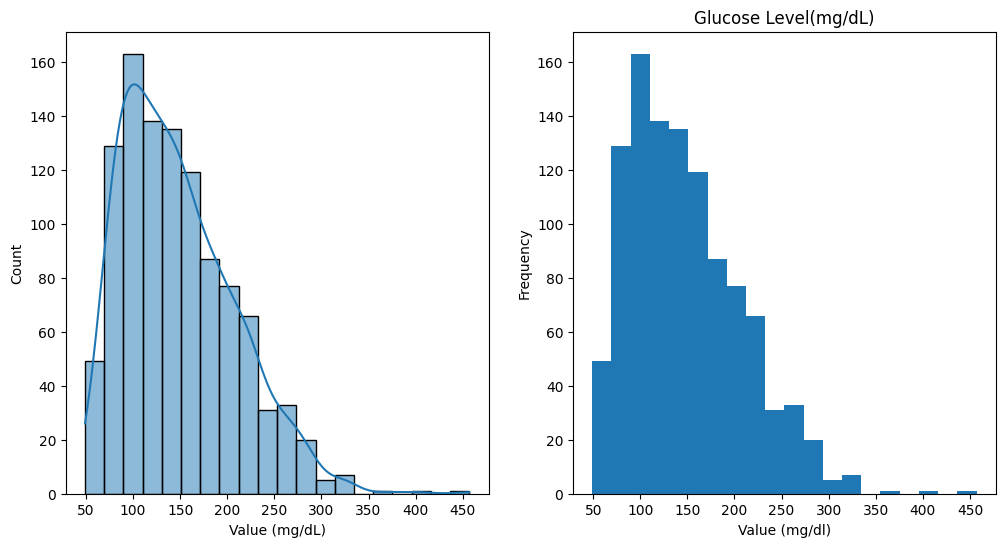

In [ ]:
# plotting histogram of the sugar levels


fig,axs = plt.subplots(1,2,figsize=(12,6))
sns.histplot(data=bg, x='Value (mg/dL)', bins=20, kde=True, ax=axs[0])

bg['Value (mg/dL)'].plot(kind='hist', bins=20, title='Glucose Level(mg/dL)', ax=axs[1])
axs[1].set_xlabel('Value (mg/dl)')
plt.show()

# plt.gca().spines[['top', 'right',]].set_visible(False)

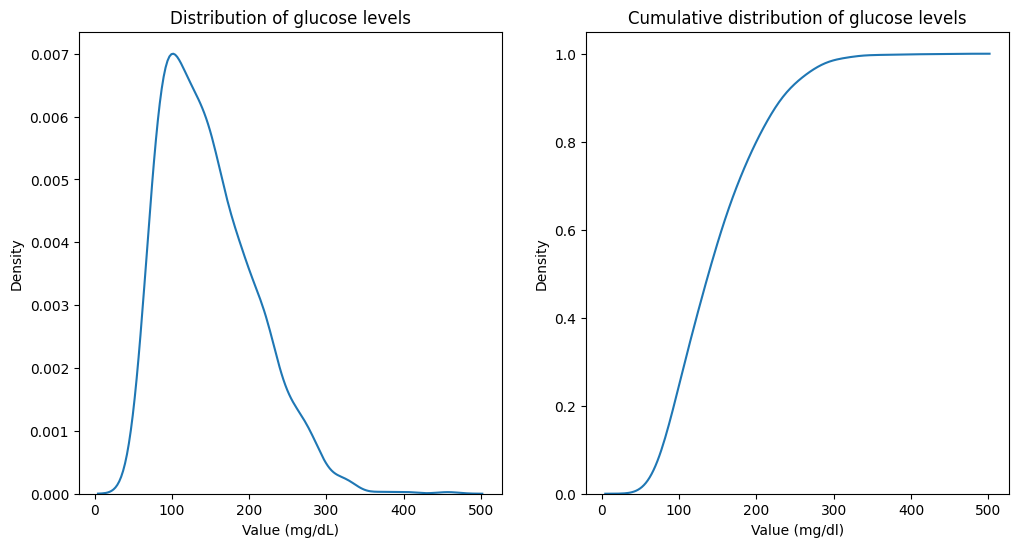

In [ ]:
# plotting histogram of the sugar levels


fig,axs = plt.subplots(1,2,figsize=(12,6))
sns.kdeplot(data=bg['Value (mg/dL)'],cumulative=False,ax=axs[0])
axs[0].set_title('Distribution of glucose levels')

sns.kdeplot(data=bg['Value (mg/dL)'],cumulative=True, ax=axs[1])
axs[1].set_title('Cumulative distribution of glucose levels')
axs[1].set_xlabel('Value (mg/dl)')
plt.show()

Text(0, 0.5, 'Time of test')

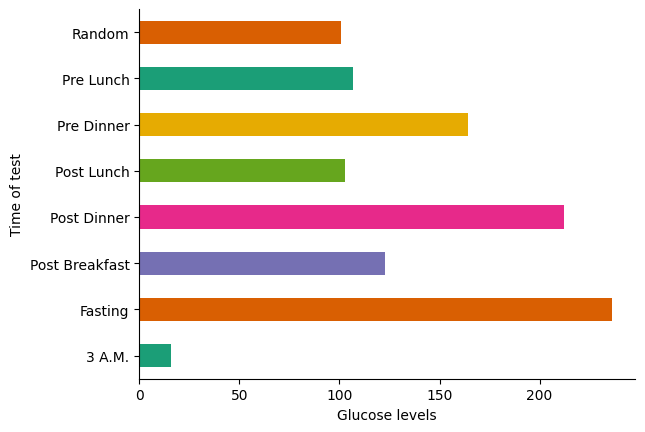

In [ ]:
# Horizontal bar graph of sugar levels
bg.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Glucose levels')
plt.ylabel('Time of test')

Text(0, 0.5, 'Time of test')

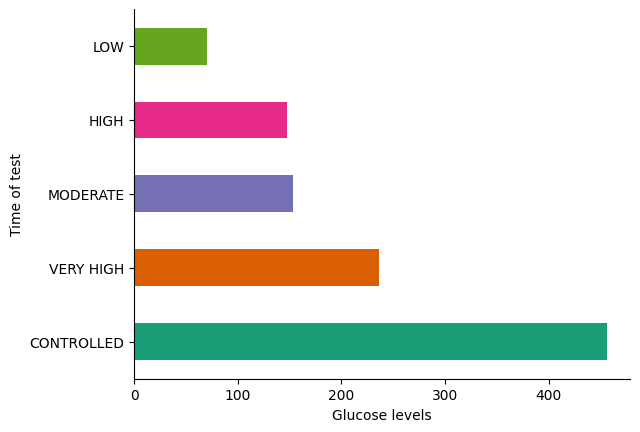

In [ ]:
bg['High/Low/In-Range'].value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Glucose levels')
plt.ylabel('Time of test')


In [ ]:
# Check the data types of each column
bg.dtypes

Date                 object
Time                 object
Type                 object
Value (mg/dL)         int64
High/Low/In-Range    object
Notes                object
dtype: object

In [ ]:
# Convert the Date and Time columns to datetime format
bg['Date'] = pd.to_datetime(bg['Date'])
bg['Time'] = pd.to_datetime(bg['Time']).dt.time

<ipython-input-44-e57f260bca7a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bg['Time'] = pd.to_datetime(bg['Time']).dt.time


In [ ]:
bg.head()

,Date,Time,Type,Value (mg/dL),High/Low/In-Range,Notes
0,2024-04-29,19:29:00,Pre Dinner,106,CONTROLLED,NaN
1,2024-04-29,17:52:00,Random,227,VERY HIGH,NaN
2,2024-04-29,16:45:00,Random,279,VERY HIGH,NaN
3,2024-04-29,10:15:00,Post Breakfast,112,CONTROLLED,NaN
4,2024-04-29,05:29:00,Fasting,196,VERY HIGH,NaN


Text(0.5, 0, 'Glucose level')

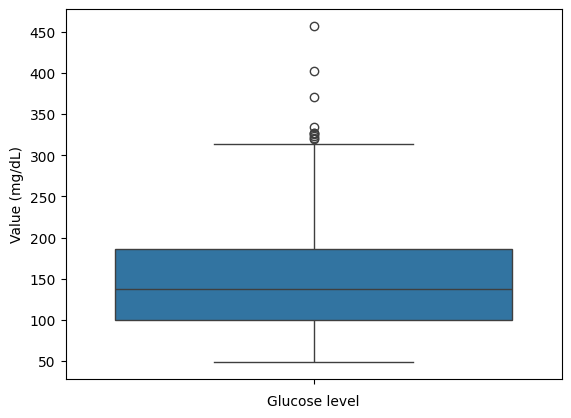

In [ ]:
sns.boxplot(data=bg['Value (mg/dL)'])
plt.xlabel('Glucose level')

In [ ]:
q1 = bg['Value (mg/dL)'].describe()[4]
q3 = bg['Value (mg/dL)'].describe()[6]
iqr = q3-q1

lower_bound = (bg['Value (mg/dL)'][bg['Value (mg/dL)'] <= q1-(1.5*iqr)]).to_list()
upper_bound = (bg['Value (mg/dL)'][bg['Value (mg/dL)'] >= q3+(1.5*iqr)]).to_list()

print(f'Extremely low glucose levels = {lower_bound}\n This means there are no, extremely low glucose levels\n')
print(f"Glucose levels that are extremely high! {upper_bound}")

Extremely low glucose levels = []
 This means there are no, extremely low glucose levels

Glucose levels that are extremely high! [371, 327, 457, 334, 327, 323, 402, 320, 321, 326]


In [ ]:
for i in upper_bound:
  print(bg[['Date', 'Time','Value (mg/dL)']][bg['Value (mg/dL)'] == i])

# pd.DataFrame(filter(lambda x: x in  [371, 327, 457, 334, 327, 323, 402, 320, 321, 326], bg['Value (mg/dL)']))

          Date      Time  Value (mg/dL)
102 2024-03-14  22:22:00            371
          Date      Time  Value (mg/dL)
109 2024-03-11  11:14:00            327
766 2023-07-31  10:06:00            327
          Date      Time  Value (mg/dL)
619 2023-09-22  18:18:00            457
          Date      Time  Value (mg/dL)
684 2023-09-01  23:02:00            334
          Date      Time  Value (mg/dL)
109 2024-03-11  11:14:00            327
766 2023-07-31  10:06:00            327
          Date      Time  Value (mg/dL)
935 2023-05-25  21:47:00            323
          Date      Time  Value (mg/dL)
992 2023-04-30  22:23:00            402
           Date      Time  Value (mg/dL)
1027 2023-04-16  04:50:00            320
           Date      Time  Value (mg/dL)
1029 2023-04-15  21:06:00            321
           Date      Time  Value (mg/dL)
1030 2023-04-15  21:04:00            326
